# **Exploração de Dados - Concessão de Crédito Bancário**

Conceder crédito bancário a um cliente é uma decisão que vem acompanhada de riscos, podendo impactar positivamente ou negativamente na saúde financeira de uma instituição bancária, fomentando o interesse em entender melhor o comportamento do cliente. 
Com isso, surge a seguinte questão: o que explica um cliente ser pagante **(adimplente)** ou não pagante **(inadimplente)**, frente ao crédito bancário lhe concedido?

Bom, com uma boa exploração de dados é possível que essa pergunta seja respondida, dando suporte para efetuar uma decisão de concessão de crédito com mais estratégia e eficiência, reduzindo os riscos.

Agora, a base de dados à que será aplicada os seguintes códigos conta com as variáveis: **resposta** e **independente**. A primeira diz respeito à coluna ***default*** compreendendo dados em forma binária **(0) Cliente Adimplente** e **(1) Cliente Indadimplente**. Já a segunda, trata-se das colunas de **escolaridade**, de **denpendentes**, de **meses de relacionamento** (entre outros) dos clientes, sob a tentativa de explicar a coluna default por intermédio desta ferramenta.

Tudo isso explicado...

Let's start!



In [52]:
#Importando Bibliotecas de interesse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#Carregando os dados
df = pd.read_csv("https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv", na_values = "na")

In [54]:
#Checando a tabela 
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Ao olhar para tabela, será examinado o tipo de variável que se está lidando. Vizualizando por cima, já se compreendem as variáveis que são categóricas ou que são numéricas:

 - O índice *salario_anual* é um valor categórico, da mesma forma que os índices *tipo_cartao*, *escolaridade*, etc. 
 
 - Para os valores numéricos, a atenção se volta principalmente para os índices *limite_credito* e *valor_transacoes_12m*, pois os dados destas colunas estão em um formato não adequado para lidar com tipos numéricos aqui no Python, especificamente o *float*.


### ESTRUTURA
É importante saber o número de linhas, separadamente, de clientes adimplentes e de clientes inadimplentes. Para saber isso, é necessário conduzir um filtro, mas antes, vamos ver a quantidade de linhas e colunas de uma forma geral.


In [55]:
#Quantidade de linhas e colunas
df.shape

(10127, 16)

In [56]:
#Quantidade de linhas de adimplentes(0) e de inadimplentes(1)
qtde_linhas_adimplentes = df[df['default'] == 0].shape[0]
qtde_linhas_inadimplentes = df[df['default'] == 1].shape[0]
total = df.shape[0]

print(f'Adimplentes: {qtde_linhas_adimplentes} | Inadimplentes: {qtde_linhas_inadimplentes}')

Adimplentes: 8500 | Inadimplentes: 1627


In [57]:
#Porcentagem relativa ao total de adimplentes e inadimplentes
print(
    f" Representação percentual:\n\
    Adimplentes - {round(100*qtde_linhas_adimplentes/total,2)}%\n\
    Inadimplentes - {round(100*qtde_linhas_inadimplentes/total,2)}%"
    )

 Representação percentual:
    Adimplentes - 83.93%
    Inadimplentes - 16.07%


De um total de 10.127 linhas, os adimplentes ocupam 83,93% dos dados, sendo um valor expressivo de clientes pagantes. Além disso, mostra-se evidente que a base de dados é desbalanceada.


**VERIFICANDO OS TIPOS DOS DADOS**

In [58]:
#Type de cada coluna
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Como previsto no começo, fez-se fato que os dados das colunas *limite_credito* e *valor_transacoes_12m* estão em um tipo que não é o correto: object. Vamos tratar esses dados! Mas antes disso...



In [59]:
#Valores categóricos
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


A contagem *count* de cada valor categórico irá indicar **gaps** na nossa base de dados, ou seja, se há dados faltantes em determinados grupos. 

Com um total de 10.127 linhas, as colunas que estão com um número inferior ao total são: *escolaridade* **(8608)**, *estado_civil* **(9378)** e  *salario_anual* **(9015)**. 


In [60]:
#Valores numéricos
df.drop("id", axis=1).select_dtypes("number").describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Para valores numéricos, todos em seu *count* se igualam ao total**(10.127)**, indicando ausência de linhas faltantes.

**DADOS FALTANTES**

In [61]:
#Colunas com dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Acima, é perceptível que apenas três colunas possuem valores faltantes(True), quais são: *escolaridade*, *estado_civil* e *salario_anual*.

Agora, quantas linhas de dados faltantes de cada uma destas três colunas há? Veremos a seguir.


In [62]:
#Definindo uma função para tirar o percentual
def dados_faltantes_sts(df: pd.DataFrame) -> None:
  missing_data_colecao = []
  for coluna in df.columns:
    if df[coluna].isna().any():
      qtd,_ = df[df[coluna].isna()].shape
      total,_ = df.shape
      dicionario_faltantes = {coluna:{"quantidade":qtd ,"percentagem":round((qtd/total) * 100, 2)}}
      missing_data_colecao.append(dicionario_faltantes)
   
  for stat in missing_data_colecao:
     print(stat)

In [63]:
#Aplicando a função nos dados em geral
dados_faltantes_sts(df)

{'escolaridade': {'quantidade': 1519, 'percentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'percentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'percentagem': 10.98}}


In [64]:
#Aplicando a função nos dados para Adimplentes
dados_faltantes_sts(df[df['default'] == 0])
print()
#Aplicando a função nos dados para Inadimplentes
dados_faltantes_sts(df[df['default'] == 1])

{'escolaridade': {'quantidade': 1263, 'percentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'percentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'percentagem': 10.88}}

{'escolaridade': {'quantidade': 256, 'percentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'percentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'percentagem': 11.49}}


É super importante ver o percentual, porque isso pode me mostrar como devo tratar esses dados faltantes.

Como os dados faltantes de Adimplentes e Inadimplentes denotam percentuais próximos entre as respectivas três colunas, parece compensar eliminar esses dados faltantes, pois não haverá desbalanceamento na nossa base de dados.


### CORREÇÃO DO SCHEMA

In [65]:
#Criando a função
Fa = lambda value: float(value.replace(".","").replace(",","."))

In [66]:
#Aplicando a função
df["valor_transacoes_12m"] = df["valor_transacoes_12m"].apply(Fa)
df["limite_credito"] = df["limite_credito"].apply(Fa)

In [67]:
#Verificando a tabela
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28


In [68]:
#Verificando o type
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora ambas as colunas estão com seus valores corrigidos!

**ELIMINAÇÃO DE DADOS FALTANTES**

In [69]:
#Removendo Na
df.dropna(inplace=True)

In [70]:
#Verificando o impacto em Adimplentes
df[df["default"] == 0].shape

(5968, 16)

In [71]:
#Verificando o impacto em Inadimplentes
df[df["default"] == 1].shape

(1113, 16)

In [72]:
#Definindo variáveis atualizadas
total_novo = df.shape[0]
qtd_a_novo = df[df["default"]== 0].shape[0]
qtd_i_novo = df[df["default"]== 1].shape[0]

In [73]:
#Atualização da proporção
print(f"\
  Proporção Adimplentes: {round(100*qtde_linhas_adimplentes/total,2)}%\n\
  Proporção Atualizada(A): {round(100*qtd_a_novo/total_novo,2)}%\n\
  \n\
  Proporção Inadimplentes: {round(100*qtde_linhas_inadimplentes/total,2)}%\n\
  Proporção Atualizada(I): {round(100*qtd_i_novo/total_novo,2)}%\n\
  ")

  Proporção Adimplentes: 83.93%
  Proporção Atualizada(A): 84.28%
  
  Proporção Inadimplentes: 16.07%
  Proporção Atualizada(I): 15.72%
  


A base de dados, após a eliminação dos dados faltantes, foi reduzida proporcionalmente, o que de fato é bom.

### VISUALIZAÇÃO DOS DADOS

Para começar com a visualização de dados, iremos partir para análise da frequência absoluta 
tanto de variáveis categóricas como de variáveis numéricas, separadamente. A finalidade é tentar encontrar um padrão nesta frequência que diferencie os clientes pagantes dos não pagantes. 

In [74]:
#Estilo para vizualização do gráfico
sns.set_style("whitegrid")

In [75]:
#Separando variáveis: Adimplentes de Inadimplentes
df_I = df[df["default"] == 1]
df_A = df[df["default"] == 0]

- ### **Visualização: Categorias**

In [76]:
#Função para visualização de variáveis categóricas
def freq_var_categoricas(coluna_: str, titulos_: list):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna_]['freq'] * 1.1
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
  for dataframe in [df, df_A, df_I]:
      df_to_plot = dataframe[coluna_].value_counts().to_frame()
      df_to_plot.rename(columns={coluna_: 'frequencia_absoluta'}, inplace=True)
      df_to_plot[coluna_] = df_to_plot.index
      df_to_plot.sort_values(by=[coluna_], inplace=True)
      df_to_plot.sort_values(by=[coluna_])
      f = sns.barplot(x=df_to_plot[coluna_], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
      f.set(title=titulos_[eixo], xlabel=coluna_.capitalize(), ylabel='Frequência Absoluta')
      f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))
      eixo += 1


In [77]:
#Função para criação dos títulos
def build_titulos(i: int, title: list):
  titulos = []
  a = f'{title[i]} dos Clientes'
  b = f'{title[i]}\n\
   dos Clientes Adimplentes'
  c = f'{title[i]}\n\
   dos Clientes Inadimplentes'
  titulos.append(a)
  titulos.append(b)
  titulos.append(c)
  return titulos

Logo abaixo, será percebido que eliminei a coluna "sexo", cujo valor categórico percebido traz a ideia de gênero. De certo, isso é perfeitamente explicável, pois, em uma política de concessão de crédito é impraticável que haja discriminação por gênero, com base na Lei Geral de Proteção aos Dados (LGPD), veja abaixo:

>Art. 6º As atividades de tratamento de dados pessoais deverão observar a boa-fé e os seguintes princípios:

>[...]
 
> IX - não discriminação: impossibilidade de realização do tratamento para fins discriminatórios ilícitos ou abusivos;

In [78]:
#colunas para aplicar em freq_var_categoricas()
colunasc = list(df.select_dtypes('object').columns)
colunasc.pop(0)
colunasc

['escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']

In [79]:
#p_titulos na confecção dos títulos p/ build_titulos()
p_titulos = list(map(lambda x: x.capitalize(),list(df_I.select_dtypes('object').columns)))
p_titulos = list(map(lambda x: x.replace('_',' '), p_titulos))
p_titulos[-1] = 'Tipo de cartão'
p_titulos.pop(0)
p_titulos

['Escolaridade', 'Estado civil', 'Salario anual', 'Tipo de cartão']

Ao final desta seção de categorias encontrar-se-á os insights extraídos de cada plot!

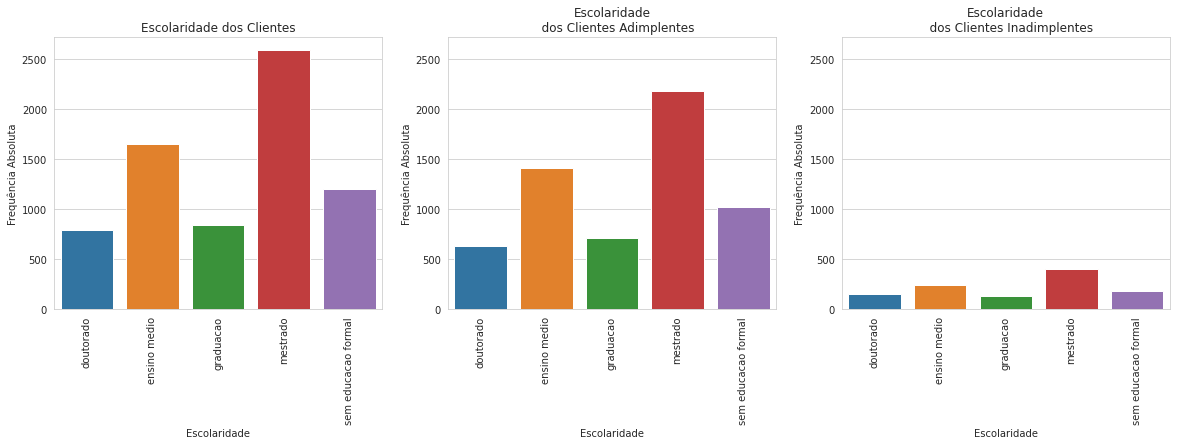

In [80]:
#Visualização da Escolaridade
freq_var_categoricas(colunasc[0],build_titulos(0,p_titulos))

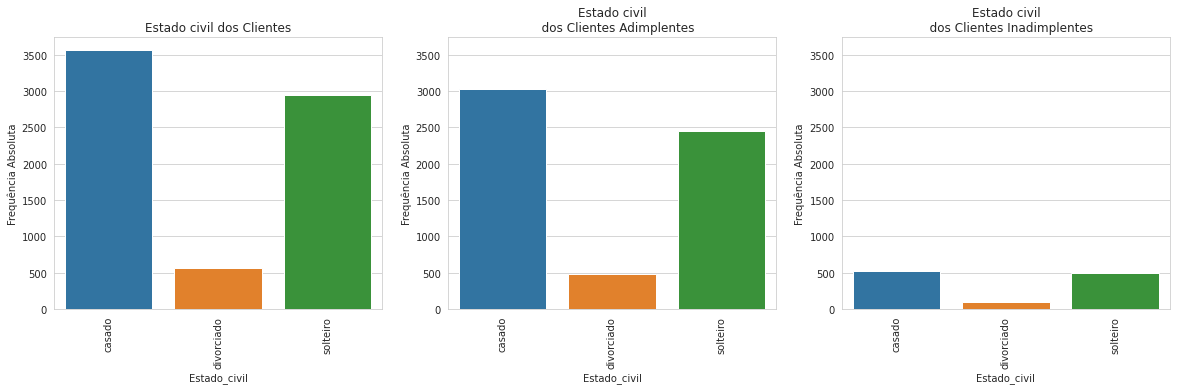

In [81]:
#Visualização do Estado Civil
freq_var_categoricas(colunasc[1],build_titulos(1,p_titulos))

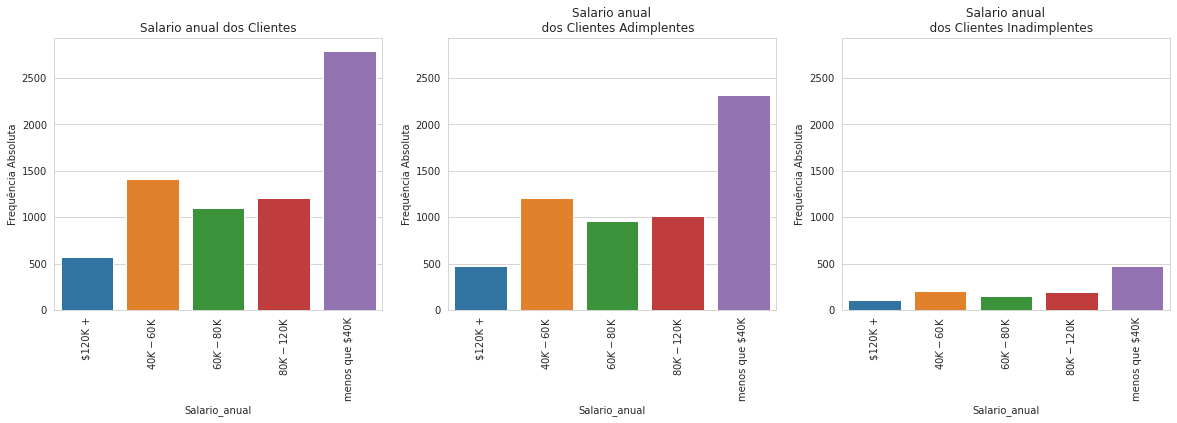

In [82]:
#Visualização do Salário Anual
freq_var_categoricas(colunasc[2],build_titulos(2,p_titulos))

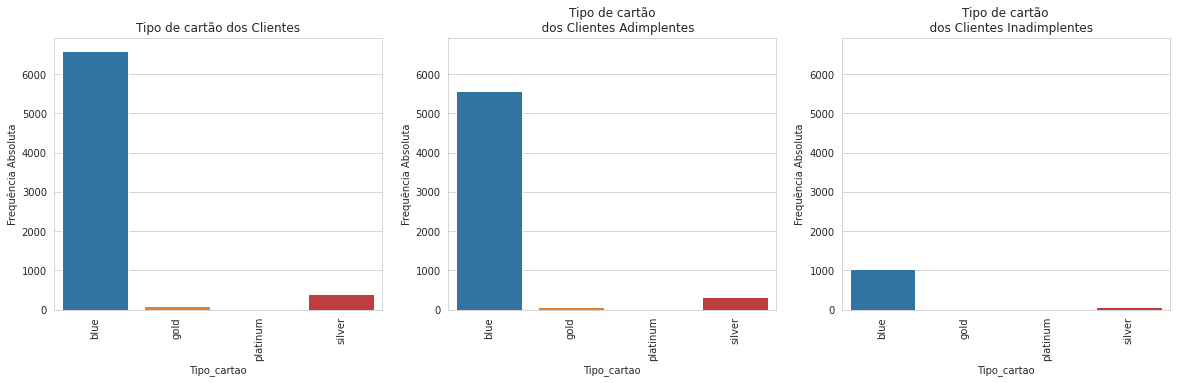

In [83]:
#Visualização do Tipo de cartão dos Clientes
freq_var_categoricas(colunasc[3],build_titulos(3,p_titulos))

**INSIGHT**

Para cada figura, proporcionalmente, foi impossível encontrar um padrão que autoexplicasse a adimplência versus a inadimplência em função de suas respectivas frequências absolutas, ou seja, ambos **default** agem similarmente nos gráficos.

- ### **Visualização: Contínuas**

In [84]:
def freq_var_numericas(_coluna: str, _titulos: list):
  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
  for dataframe in [df, df_A, df_I]:
    f = sns.histplot(x=_coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=_titulos[eixo], xlabel=_coluna.capitalize(), ylabel='Frequência Absoluta')
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

  figura.show()

In [85]:
#Colunas para aplicar em freq_var_numericas()
colunasn = list(df.drop(['id', 'default'], axis=1).select_dtypes('number').columns)

In [86]:
#Títulos para aplicar em freq_var_numericas()
titulos_a= list(map(lambda x: x.replace("_"," "),list(map(lambda x: x.capitalize(),colunasn))))
titulos_a[3] = "Quantidade de produtos"
titulos_a[-3] = "Limite de Crédito"
titulos_a[-1] = "Quantidade de transações no último ano"
n = 0
for titulo in titulos_a:
  if "12m" in titulo:
    titulo = titulo.replace("12m", "no último ano")
    titulos_a[n] = titulo
  n+=1

Da mesma maneira que as variáveis categóricas, os insights se encontram ao final desta seção.

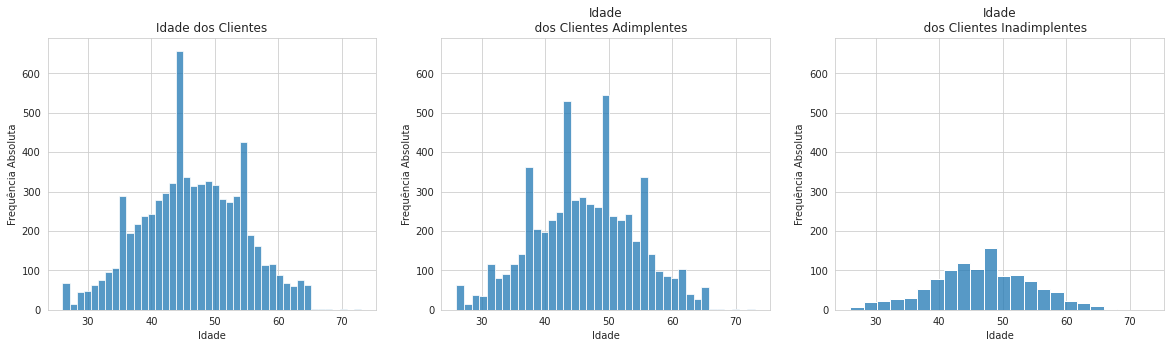

In [87]:
#Visualização da Idade
freq_var_numericas(colunasn[0],build_titulos(0,titulos_a))

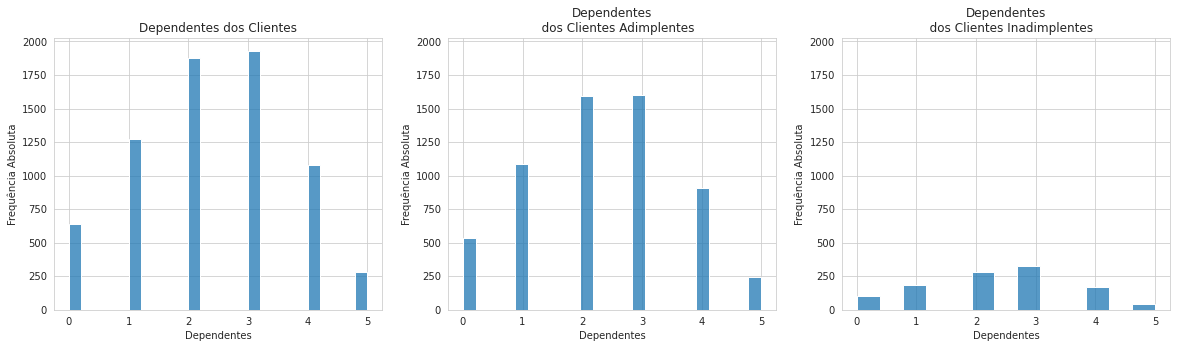

In [88]:
#Visualização dos Dependentes
freq_var_numericas(colunasn[1],build_titulos(1,titulos_a))

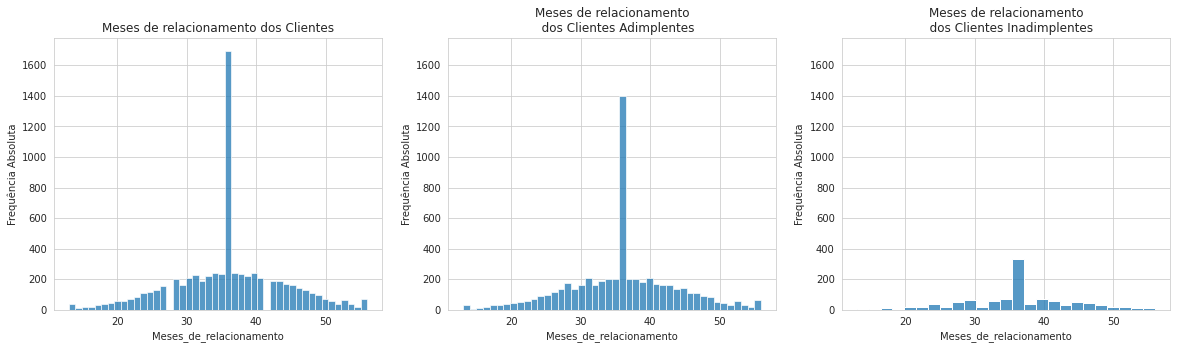

In [89]:
#Visualização dos Meses de Relacionamento
freq_var_numericas(colunasn[2],build_titulos(2,titulos_a))

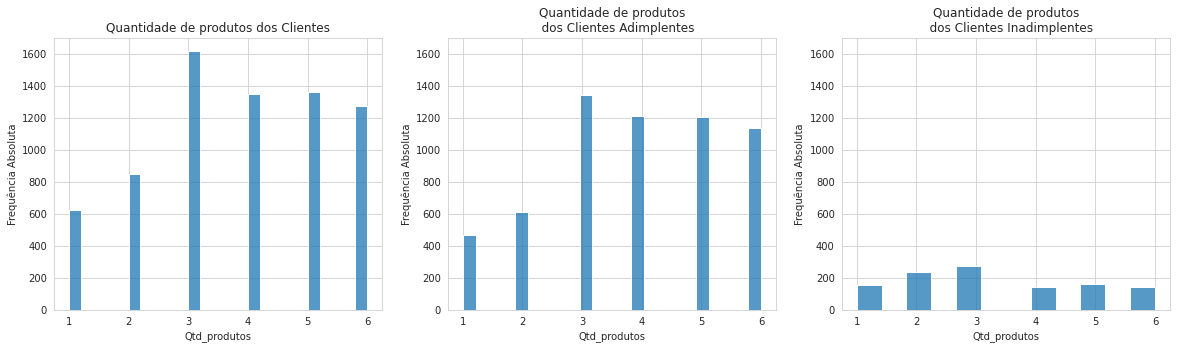

In [90]:
#Visualização da Quantidade de Produtos
freq_var_numericas(colunasn[3],build_titulos(3,titulos_a))

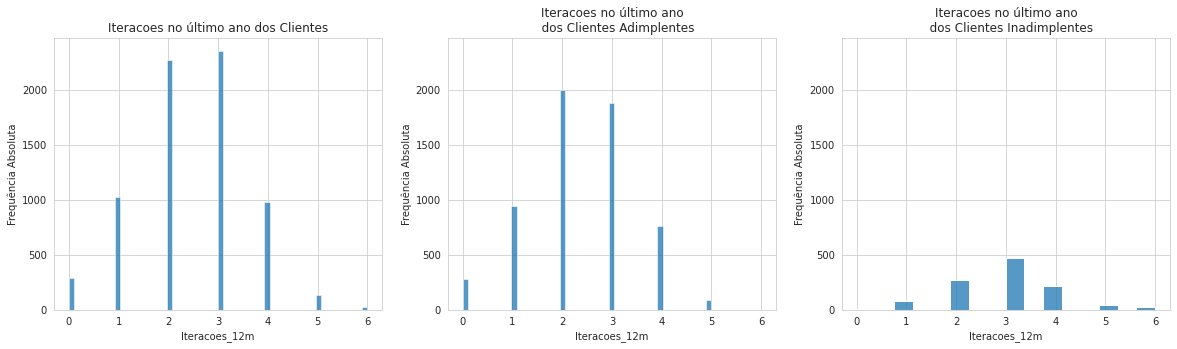

In [91]:
#Visualização da Iteração no Último Ano
freq_var_numericas(colunasn[4],build_titulos(4,titulos_a))

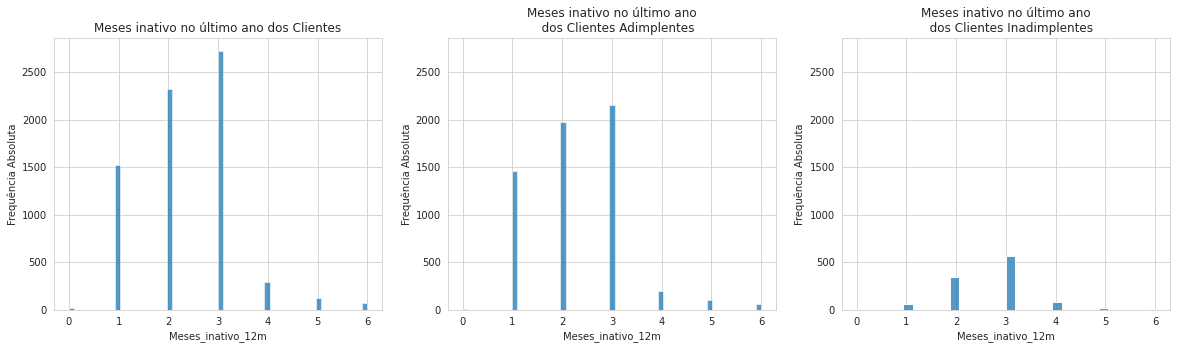

In [92]:
#Visualização de Meses Inativo no Último Ano
freq_var_numericas(colunasn[5],build_titulos(5,titulos_a))

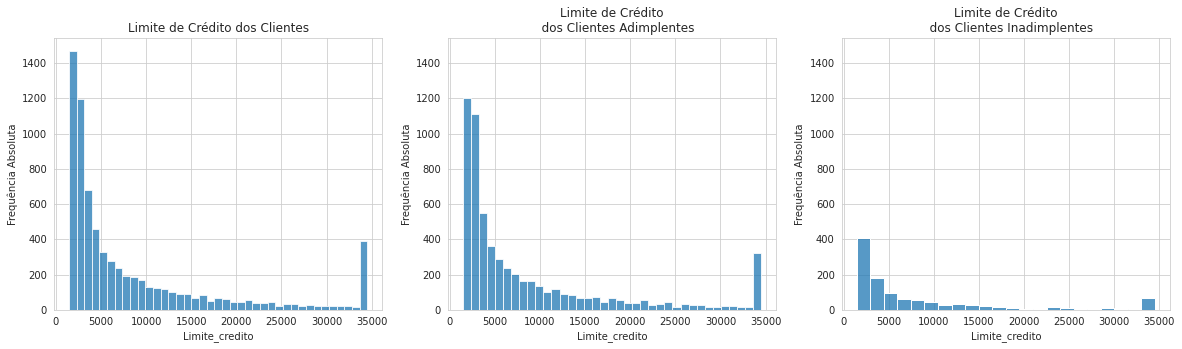

In [93]:
#Visualização do Limite de Crédito
freq_var_numericas(colunasn[6],build_titulos(6,titulos_a))

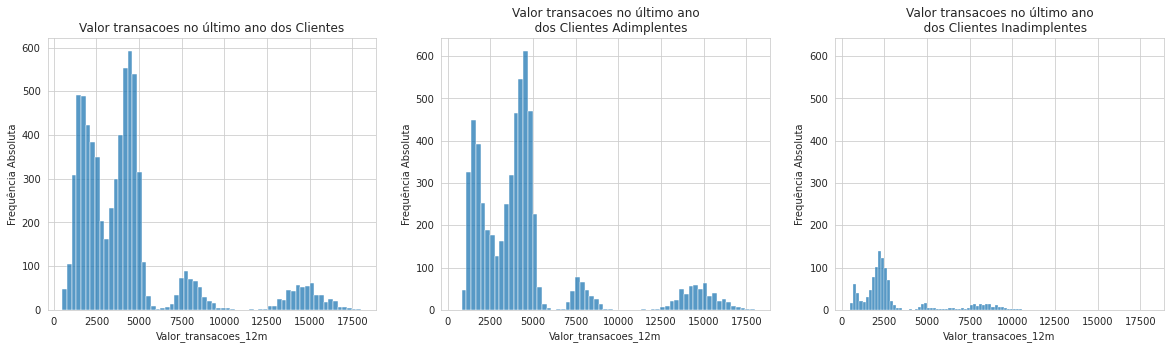

In [94]:
#Visualização do Valor das Transações no Último Ano
freq_var_numericas(colunasn[7],build_titulos(7,titulos_a))

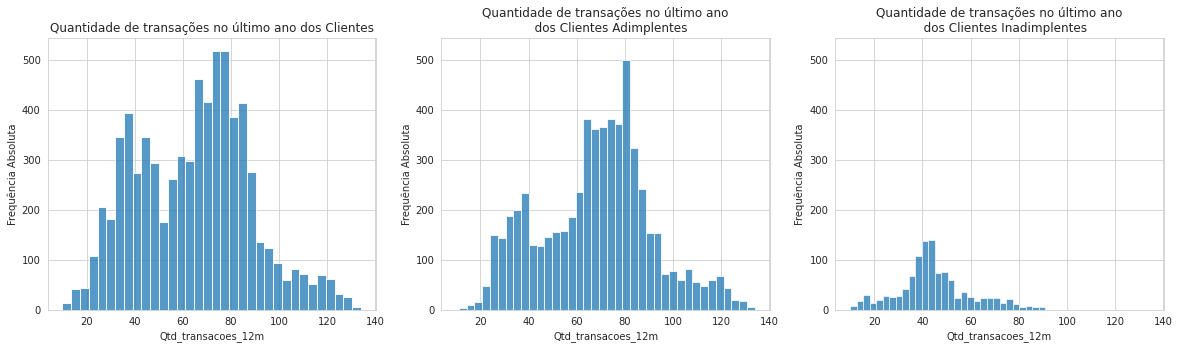

In [95]:
#Visualização da Quantidade de Transações no Último Ano
freq_var_numericas(colunasn[8],build_titulos(8,titulos_a))

**INSIGHTS**

Entre todos os gráficos de frequência, apenas dois apresentaram padrões que se diferem e que conseguem segregar bem os clientes pagantes dos não pagantes, sendo a **A Quantidade de transações nos últimos 12 meses** e **Valor das transações nos últimos 12 meses**.

1. **A Quantidade de transações nos últimos 12 meses**: no gráfico de clientes pagantes, de 0 a 1500 do valor de transações temos um pico não abrupto e, de 2800 a 6000 do valor de transações, outro pico configura-se, havendo um gap em forma de V entre esses dois picos, o que denuncia um menor número de clientes pagantes ali (1500 a 2800 do valor de transações). Complementar a isso, o gráfico de clientes não pagantes forma uma configuração que se encaixa como quebra-cabeça àquele gap em forma de V, ou seja, de 1500 a 2800 do valor de transações o gráfico de não pagantes forma um pico, induzindo, por tanto, uma zona perigosa para concessão de crédito. 

2. **Valor das transações nos últimos 12 meses**: De maneira semelhante, o padrão encontrado entre 35 a 55 transações vê-se que há um pico de clientes inadimplentes, preenchendo o "quebra-cabeça" do gráfico de adimplentes, apresentando-se uma red flag nessa zona para concessão de crédito. 

- ### **Visualização: Relacionamento entre variáveis**

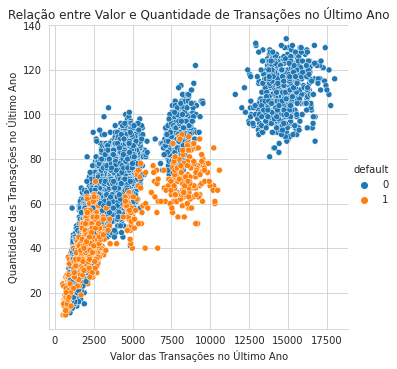

In [96]:
#Gráfico: Relação entre Valor e Quantidade de Transações no Último Ano (adimplentes|inadimplentes)
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

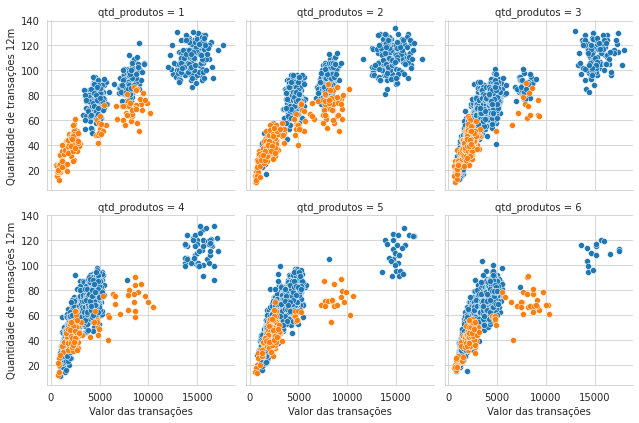

In [97]:
#Gráfico: Relação entre Valor e Quantidade de Transações no Último Ano (adimplentes|inadimplentes) por Quantidade de Produtos
h = sns.FacetGrid(df, col="qtd_produtos", hue='default', col_wrap=3)
h.map(sns.scatterplot,'valor_transacoes_12m','qtd_transacoes_12m')
h.set(
    xlabel='Valor das transações',
    ylabel='Quantidade de transações 12m'
)

**INSIGHTS**

Há dois (2) gráficos de relação entre duas variáveis, os quais respectivamente serão comentados:
* **Relação entre Valor e Quantidade de Transações no Último Ano (adimplentes|inadimplentes) por Quantidade de Produtos**: Esse é o primeiro gráfico desta seção e basicamente guiará o outro que o sucede, ele demonstra o plot pontilhado da relação entre o valor e a quantidade de transações e também classifica cada ponto como adimplente em azul e inadimplente em laranja. Isso dito, já é possível ver que existe aí uma correlação positiva intuitivamente, o que demonstra que à medida que valor transicionado aumenta por esse cliente, a tendência é que ele faça ainda mais transações. Com isso, esses clientes que estão situados em uma faixa alta (**Valor das Transações** entre **12.500 a 17.500** e 1**00 a 140 transações nos últimos 12 meses**) são clientes os quais não se deve preocupar, por ora, pois **são adimplentes** em sua completude, bem como aqueles situados em **70 a 100 transações** e com **valor de 2500 a 6000** das transações. Quanto aos **clientes inadimplentes**, apresentam-se mesclados aos adimplentes (no valor das transações entre 0 a 10.000 e com 0 a 90 transações nos últimos 12 meses), sendo importante investigar qual outra variável explicativa pode segregá-los dos adimplentes, o que foi feito e encontrado no próximo tópico.  

* **Relação entre Valor e Quantidade de Transações no Último Ano (adimplentes|inadimplentes) por Quantidade de Produtos**: Neste gráfico podemos ver que é o mesmo do tipo pontilhado, embora cada bloco 2x3 respresenta a quantidade de produtos que os clientes têm contratado com a instituição financeira (de 1 a 6 produtos). Daqui extraem-se muitas informações relevantes, dentre elas é que:
     - Claramente, os clientes que contratam apenas 1 produto, que fazem transações com valor de 0 a 3000 e transacionam de 0 a 60 vezes nos últimos 12 meses são somente **clientes inadimplentes** (laranja).Aplicando-se o mesmo raciocínio aos clientes que contrataram 2 produtos, entretanto, com pouquissímos clientes adimplentes, sendo inadimplentes em grande quantidade.
     - Os clientes que contrataram de 4 a 6 produtos, com valor transicionado entre 6000 a 10.100 e com 60 a 90 transações nos últimos 12 meses, são clientes que não honram suas dívidas. 
